## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3         X4           Y
0  73.598403   892.691251  0.306833  10.549321  283.757161
1   8.447990   807.849957  0.423432  10.599086  342.238916
2  24.752808  1518.037712  0.558973   4.607735  849.034285
3  47.604994   163.959259  0.446314   8.002538   87.315341
4  98.167590   660.546712  0.167348   8.831863  147.857348


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0039336	total: 57.2ms	remaining: 57.1s
1:	learn: 0.9917225	total: 57.8ms	remaining: 28.8s
2:	learn: 0.9810454	total: 58.3ms	remaining: 19.4s
3:	learn: 0.9703461	total: 58.8ms	remaining: 14.6s
4:	learn: 0.9583293	total: 59.3ms	remaining: 11.8s
5:	learn: 0.9470665	total: 59.9ms	remaining: 9.93s
6:	learn: 0.9343017	total: 60.4ms	remaining: 8.56s
7:	learn: 0.9219161	total: 60.8ms	remaining: 7.54s
8:	learn: 0.9118181	total: 61.3ms	remaining: 6.75s
9:	learn: 0.8983463	total: 61.8ms	remaining: 6.11s
10:	learn: 0.8875714	total: 62.2ms	remaining: 5.59s
11:	learn: 0.8746346	total: 62.7ms	remaining: 5.16s
12:	learn: 0.8637834	total: 63.2ms	remaining: 4.8s
13:	learn: 0.8523343	total: 63.7ms	remaining: 4.48s
14:	learn: 0.8414853	total: 64.2ms	remaining: 4.21s
15:	learn: 0.8312393	total: 64.6ms	remaining: 3.97s
16:	learn: 0.8207359	total: 64.9ms	remaining: 3.75s
17:	learn: 0.8102279	total: 65.4ms	remaining: 3.57s
18:	learn: 0.8017133	total: 66.1ms	remaining:

105:	learn: 0.3051201	total: 107ms	remaining: 905ms
106:	learn: 0.3023172	total: 108ms	remaining: 900ms
107:	learn: 0.2986864	total: 108ms	remaining: 894ms
108:	learn: 0.2962667	total: 109ms	remaining: 889ms
109:	learn: 0.2925943	total: 109ms	remaining: 882ms
110:	learn: 0.2894949	total: 110ms	remaining: 878ms
111:	learn: 0.2868848	total: 110ms	remaining: 871ms
112:	learn: 0.2844333	total: 110ms	remaining: 866ms
113:	learn: 0.2817811	total: 111ms	remaining: 861ms
114:	learn: 0.2789549	total: 111ms	remaining: 855ms
115:	learn: 0.2763014	total: 112ms	remaining: 850ms
116:	learn: 0.2734053	total: 112ms	remaining: 845ms
117:	learn: 0.2703345	total: 113ms	remaining: 841ms
118:	learn: 0.2679324	total: 113ms	remaining: 836ms
119:	learn: 0.2647990	total: 113ms	remaining: 831ms
120:	learn: 0.2615664	total: 114ms	remaining: 827ms
121:	learn: 0.2591187	total: 114ms	remaining: 822ms
122:	learn: 0.2558525	total: 115ms	remaining: 817ms
123:	learn: 0.2538098	total: 115ms	remaining: 814ms
124:	learn: 

277:	learn: 0.0812714	total: 186ms	remaining: 483ms
278:	learn: 0.0809551	total: 186ms	remaining: 482ms
279:	learn: 0.0804371	total: 187ms	remaining: 480ms
280:	learn: 0.0799166	total: 187ms	remaining: 479ms
281:	learn: 0.0796725	total: 188ms	remaining: 478ms
282:	learn: 0.0791124	total: 188ms	remaining: 477ms
283:	learn: 0.0788418	total: 189ms	remaining: 475ms
284:	learn: 0.0785595	total: 189ms	remaining: 474ms
285:	learn: 0.0783108	total: 189ms	remaining: 473ms
286:	learn: 0.0780492	total: 190ms	remaining: 471ms
287:	learn: 0.0774794	total: 190ms	remaining: 470ms
288:	learn: 0.0771831	total: 190ms	remaining: 469ms
289:	learn: 0.0768122	total: 191ms	remaining: 468ms
290:	learn: 0.0765635	total: 191ms	remaining: 466ms
291:	learn: 0.0760224	total: 192ms	remaining: 465ms
292:	learn: 0.0754865	total: 192ms	remaining: 464ms
293:	learn: 0.0750094	total: 193ms	remaining: 463ms
294:	learn: 0.0747692	total: 193ms	remaining: 462ms
295:	learn: 0.0742966	total: 194ms	remaining: 460ms
296:	learn: 

510:	learn: 0.0349252	total: 290ms	remaining: 277ms
511:	learn: 0.0348971	total: 290ms	remaining: 276ms
512:	learn: 0.0348694	total: 290ms	remaining: 276ms
513:	learn: 0.0347194	total: 291ms	remaining: 275ms
514:	learn: 0.0346019	total: 291ms	remaining: 274ms
515:	learn: 0.0344881	total: 291ms	remaining: 273ms
516:	learn: 0.0343363	total: 292ms	remaining: 273ms
517:	learn: 0.0341906	total: 292ms	remaining: 272ms
518:	learn: 0.0341331	total: 293ms	remaining: 272ms
519:	learn: 0.0341072	total: 293ms	remaining: 271ms
520:	learn: 0.0340108	total: 294ms	remaining: 270ms
521:	learn: 0.0339030	total: 294ms	remaining: 269ms
522:	learn: 0.0337731	total: 294ms	remaining: 269ms
523:	learn: 0.0336596	total: 295ms	remaining: 268ms
524:	learn: 0.0335196	total: 295ms	remaining: 267ms
525:	learn: 0.0334825	total: 296ms	remaining: 266ms
526:	learn: 0.0333732	total: 296ms	remaining: 266ms
527:	learn: 0.0332366	total: 297ms	remaining: 265ms
528:	learn: 0.0331853	total: 297ms	remaining: 264ms
529:	learn: 

680:	learn: 0.0183461	total: 369ms	remaining: 173ms
681:	learn: 0.0182689	total: 369ms	remaining: 172ms
682:	learn: 0.0181774	total: 370ms	remaining: 172ms
683:	learn: 0.0180811	total: 370ms	remaining: 171ms
684:	learn: 0.0179862	total: 371ms	remaining: 171ms
685:	learn: 0.0178926	total: 371ms	remaining: 170ms
686:	learn: 0.0178003	total: 372ms	remaining: 169ms
687:	learn: 0.0177093	total: 372ms	remaining: 169ms
688:	learn: 0.0175895	total: 373ms	remaining: 168ms
689:	learn: 0.0175407	total: 373ms	remaining: 168ms
690:	learn: 0.0174622	total: 374ms	remaining: 167ms
691:	learn: 0.0173459	total: 374ms	remaining: 167ms
692:	learn: 0.0172716	total: 375ms	remaining: 166ms
693:	learn: 0.0171960	total: 375ms	remaining: 165ms
694:	learn: 0.0171237	total: 376ms	remaining: 165ms
695:	learn: 0.0170524	total: 376ms	remaining: 164ms
696:	learn: 0.0169791	total: 376ms	remaining: 164ms
697:	learn: 0.0168941	total: 377ms	remaining: 163ms
698:	learn: 0.0168247	total: 377ms	remaining: 163ms
699:	learn: 

901:	learn: 0.0074005	total: 473ms	remaining: 51.4ms
902:	learn: 0.0073752	total: 474ms	remaining: 50.9ms
903:	learn: 0.0073652	total: 474ms	remaining: 50.3ms
904:	learn: 0.0073554	total: 474ms	remaining: 49.8ms
905:	learn: 0.0073293	total: 475ms	remaining: 49.3ms
906:	learn: 0.0073196	total: 475ms	remaining: 48.7ms
907:	learn: 0.0073100	total: 476ms	remaining: 48.2ms
908:	learn: 0.0072844	total: 476ms	remaining: 47.7ms
909:	learn: 0.0072753	total: 477ms	remaining: 47.1ms
910:	learn: 0.0072618	total: 477ms	remaining: 46.6ms
911:	learn: 0.0072371	total: 477ms	remaining: 46.1ms
912:	learn: 0.0072034	total: 478ms	remaining: 45.6ms
913:	learn: 0.0071944	total: 479ms	remaining: 45ms
914:	learn: 0.0071704	total: 479ms	remaining: 44.5ms
915:	learn: 0.0071508	total: 479ms	remaining: 44ms
916:	learn: 0.0071131	total: 480ms	remaining: 43.4ms
917:	learn: 0.0070805	total: 480ms	remaining: 42.9ms
918:	learn: 0.0070717	total: 481ms	remaining: 42.4ms
919:	learn: 0.0070630	total: 481ms	remaining: 41.8

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

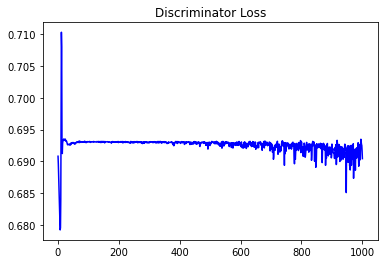

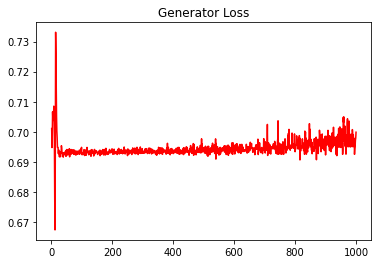

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.006096167182293677


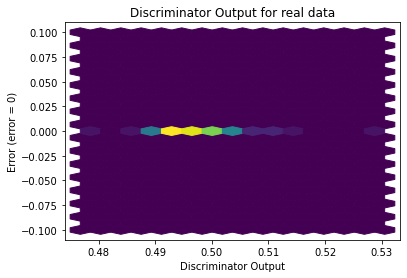

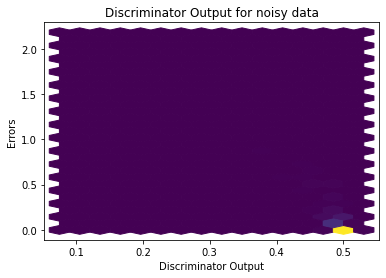

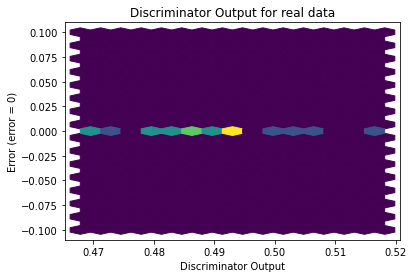

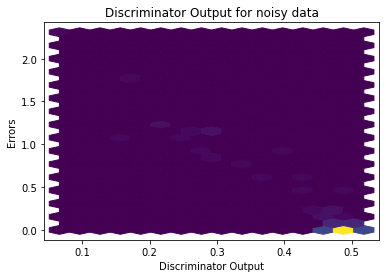

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


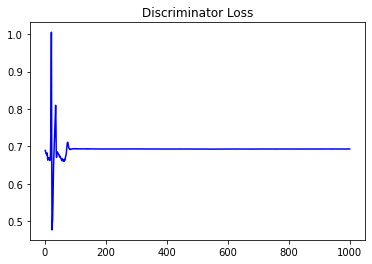

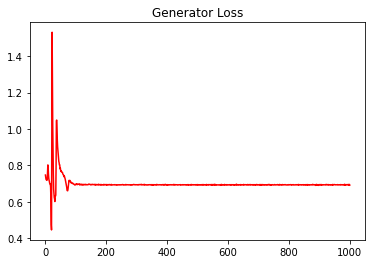

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.002577412497252776


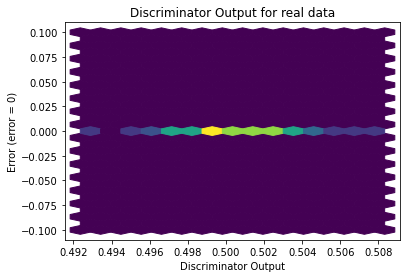

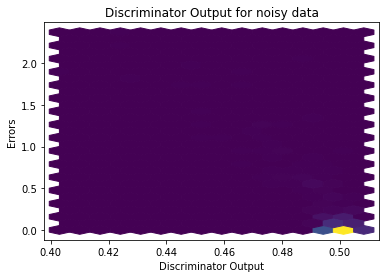

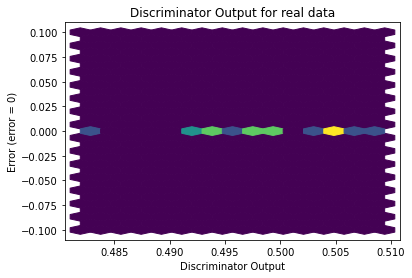

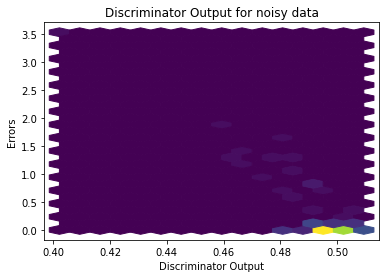

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.8584]], requires_grad=True)
